### Boston Housing Dataset

The purpose of this assignment is to conduct an analysis on the boston housing dataset. The analysis will review whether there is a significant difference in median house prices along the Charles river and those that aren’t. This assigment will also predict the median house prices through generating neural networks using Keras.

#### About the dataset 
The dataset used in this assessment has been downloaded from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php. The dataset contains US census housing data related to various houses in areas around the city of Boston.This dataset contains 506 rows and 14 columns. 

The fourteen columns consist of the following data: 

|Column Name |     Column Description                                                      |
|------------|-----------------------------------------------------------------------------|
|CRIM        |Crime rates per town (CRIM)                                                  |
|ZN          |Proportion of residential land zoned for lots over 25,000 sq.ft.             |
|Indus       |Proportion of non-retail business acres per town                             |
|Chas        |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        |
|Nox         |Nitrogen oxides concentration (parts per 10 million)                         |
|Rm          |Average number of rooms per dwelling                                         |
|Age         |Proportion of owner-occupied units built prior to 1940                       |
|Dis         |Weighted mean of distances to five Boston employment centres                 |
|Rad         |Index of accessibility to radial highways                                    |
|Tax         |Full-value property-tax rate per 10,000                                       |
|Ptratio     | pupil-teacher ratio by town                                                  |
|Black       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town               |
|Lstat       | lower status of the population (percent)                                     |
|Medv        | median value of owner-occupied homes in $1000s                               |
    
    
    
    
    
    
    
    

#### Import Data 
The Boston Housing dataset was imported into a jupyter notebook. The first five lines of the data were displayed as well as  the datatypes, to ensure that the data had been imported correctly.

In [102]:
# Author Róisín Anglim 29-09-19
# Import packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()
#Set random seed for reproducability 
np.random.seed(42) 


In [103]:
#Show data datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### Cleaning the Data

The data was reviewed to identifying missing,duplicate or unnecessary data, in order to remove them from the analysis. 

Descriptive statistics was used on the data, to review if any columns contained a min value of zero. A minimum value of zero can indicate missing or invalid data.The only coulmns within this dataset that contained minimum values of zero were, ZN and CHAS. 
CHAS contains boolean values of 1 and 0, indicating whether the house is along the river or not.This column was eliminated from the review. ZN has been identified as having 372 cells with values equal to zero. ZN represents the amount of zoned land and will be zero for areas that have not been zoned. This coulmn was also eliminated.

The pandas package was used to identify Null values and duplicate values. No cells within the dataset were identified as having either.

Each variable within the dataset was plotted on a scatterplot inorder to identify outliers. No data was eliminated from the dataset.

In [104]:
# Show descriptive statistics to identify missing or invalid data.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [105]:
##### Identify the number of zero value cells
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [106]:
#Identify duplicate rows
#df.duplicated(subset=None, keep=True)
df[df.duplicated(keep='first')]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


#### Identify Outliers

<Figure size 1200x1200 with 0 Axes>

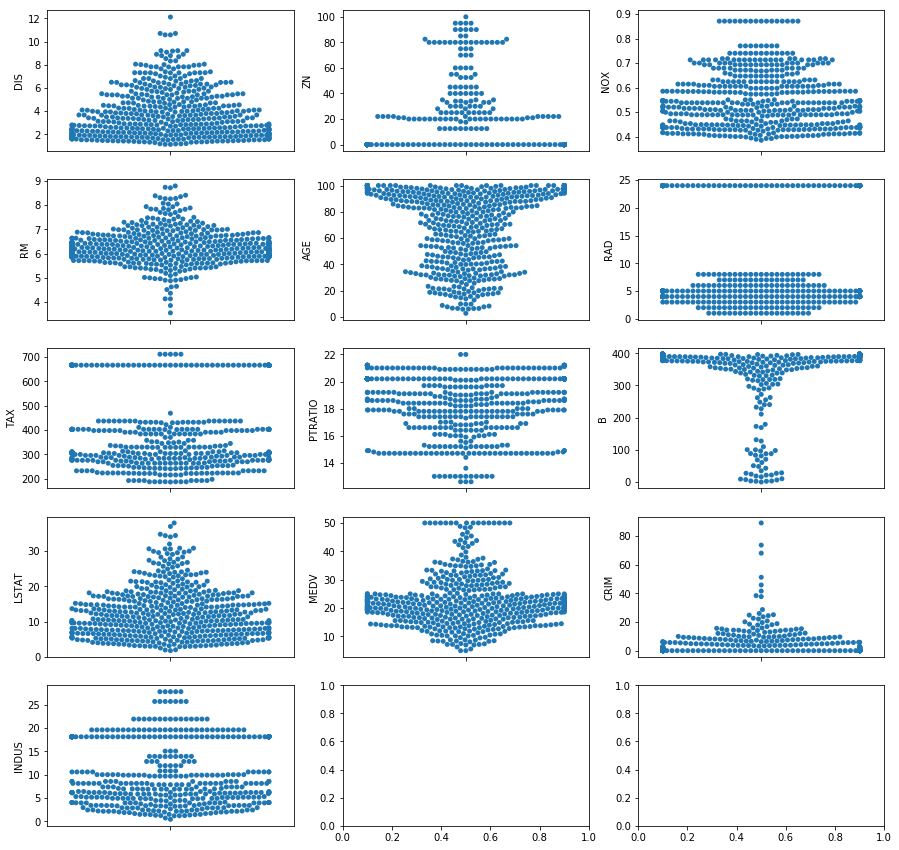

In [107]:
## Univariate Analysis
#Plot scatterplot data to identify outliers 
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=5)
sns.swarmplot(y="DIS",data=df,ax=ax[0][0])
sns.swarmplot(y="ZN",data=df, ax=ax[0][1])
sns.swarmplot(y="NOX",data=df,ax=ax[0][2])
sns.swarmplot(y="RM",data=df,ax=ax[1][0])
sns.swarmplot(y="AGE",data=df,ax=ax[1][1])
sns.swarmplot(y="RAD",data=df,ax=ax[1][2])
sns.swarmplot(y="TAX",data=df,ax=ax[2][0])
sns.swarmplot(y="PTRATIO",data=df,ax=ax[2][1])
sns.swarmplot(y="B",data=df,ax=ax[2][2])
sns.swarmplot(y="LSTAT",data=df,ax=ax[3][0])
sns.swarmplot(y="MEDV",data=df,ax=ax[3][1])
sns.swarmplot(y="CRIM",data=df,ax=ax[3][2])
sns.swarmplot(y="INDUS",data=df,ax=ax[4][0])
plt.show()
%matplotlib inline

### Inferential Statistics 
#### Plot median house value distribution

The data was split between houses alongside the river and houses not alongside the river. The median values of these properties were plotted.

##### Observation
There is a normal distribution for the houses along the river and a bimodal distribution between those not along the river.

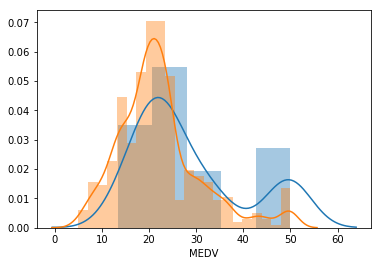

In [108]:
#x = np.random.normal(size=100)
## Select the data where the houses are along the river
r= df.loc[df['CHAS'] == 1]
## Select the data where the houses are not along the river
s = df.loc[df['CHAS'] == 0]
#Plot distributions of houses along the river and not along the river
sns.distplot(r.MEDV)
sns.distplot(s.MEDV)
plt.show()
%matplotlib inline

#### Result - Independant T-Test
An independant t-test was conducted on the two groups median house values. The first group r consisted of the houses along the river and the secound group s consisted of the houses not along the river. 
The results indicated that with a p-value 0f 0.07 the results are not significantly different.

In [109]:
#Independant t-test

ttest = stats.ttest_ind(r['MEDV'], s['MEDV'])
print(ttest)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


### Linear Regression 

#### Correlation Matrix Review

The correlation matrix was used to identify variables highly correlated to the median house prices.

From the correlation matrix the percentage of the population that is lower class(LSTAT) and the number of rooms per house(RM), have the highest correlation 74% and 70%. As the number of rooms (RM) increase the median house prices (MEDV) increase. In contrast to this as the lower class popoulation percentage (LSTAT) increases the median house prices decrease (MEDV).

The correlation matrix was used to check for multi-co-linearity. The variables RAD and TAX have a correlation of 91%. The variables DIS and Age have a correlation of 75%.NOX and INDUS have a correlation of 76%. Only one of each of the highly correlated variables will be selected for training the model.

#### Correlation Matrix Plot

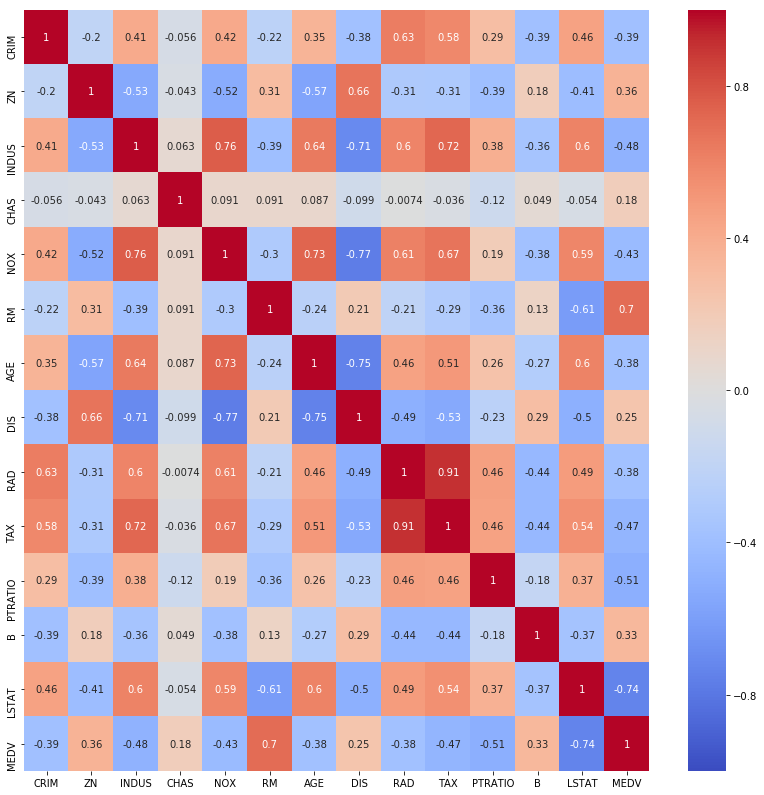

In [110]:
###BI Variate analysis
##Create correlation matrix

plt.figure(figsize=(14,14))
#Add coolwarn colour and annotations for each correlation
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);
plt.show()
%matplotlib inline

#### Plot Distribution of Median House Prices

The median house price distribution is plotted, to see that the house prices are normally distributed. 

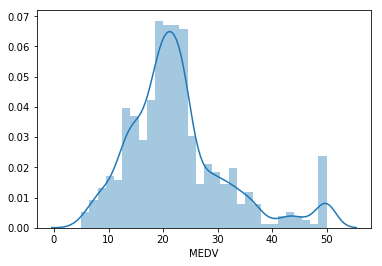

In [111]:
#Plots the distribution of the median house prices
sns.distplot(df['MEDV'], bins=30)
plt.show()
%matplotlib inline

#### Scatterplot 
The scatterplot was used to identify variables with a linear relationship to the median house prices.
It is evident from the plots that RM and LSTAT have a linear relationship. As the number of rooms (RM) increase the median value(MEDV) increases. Contrastingly as the percentage population of lower class increases, the median houses decrease.

<Figure size 1200x1200 with 0 Axes>

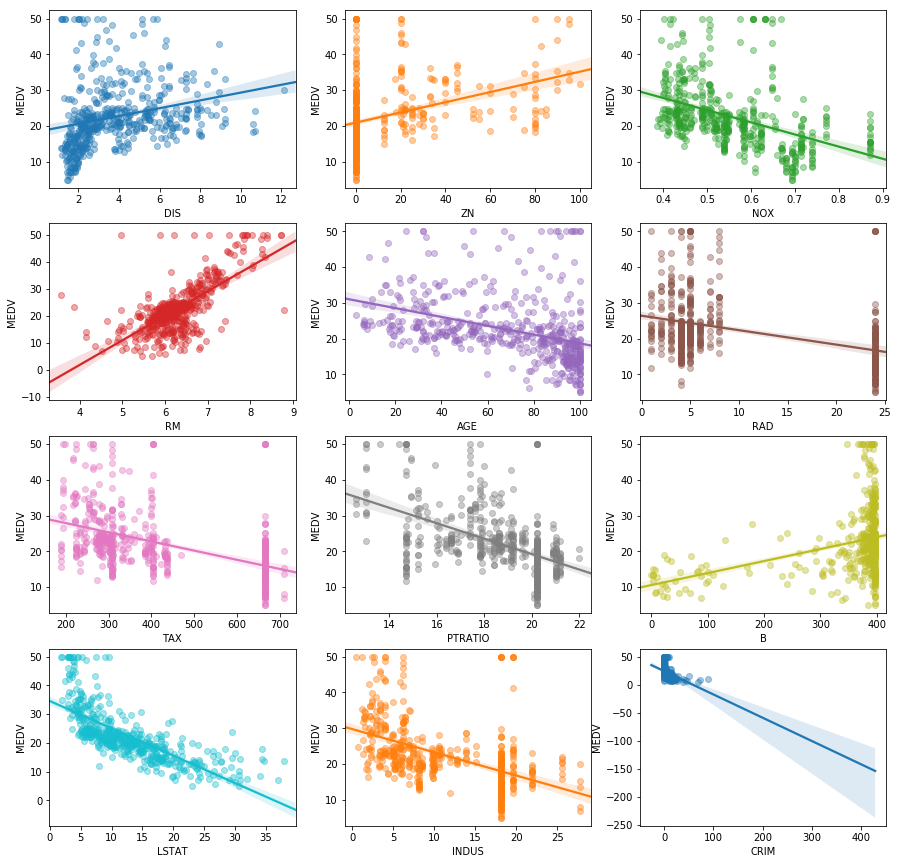

In [112]:
#Creates a multiple scatterplots for all variables against the target variable
fig= plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=4)
sns.regplot("DIS","MEDV",df,ax=ax[0][0],scatter_kws={'alpha': 0.4})
sns.regplot("ZN","MEDV",df, ax=ax[0][1],scatter_kws={'alpha': 0.4})
sns.regplot("NOX","MEDV",df,ax=ax[0][2],scatter_kws={'alpha': 0.4})
sns.regplot("RM","MEDV",df,ax=ax[1][0],scatter_kws={'alpha': 0.4})
sns.regplot("AGE","MEDV",df,ax=ax[1][1],scatter_kws={'alpha': 0.4})
sns.regplot("RAD","MEDV",df,ax=ax[1][2],scatter_kws={'alpha': 0.4})
sns.regplot("TAX","MEDV",df,ax=ax[2][0],scatter_kws={'alpha': 0.4})
sns.regplot("PTRATIO","MEDV",df,ax=ax[2][1],scatter_kws={'alpha': 0.4})
sns.regplot("B","MEDV",df,ax=ax[2][2],scatter_kws={'alpha': 0.4})
sns.regplot("LSTAT","MEDV",df,ax=ax[3][0],scatter_kws={'alpha': 0.4})
sns.regplot("CRIM","MEDV",df,ax=ax[3][2],scatter_kws={'alpha': 0.4})
sns.regplot("INDUS","MEDV",df,ax=ax[3][1],scatter_kws={'alpha': 0.4})
plt.show()
%matplotlib inline

#### Multiple Linear Regression Model

#### Selecting Variables
Based on the correlation matrix, highly correlated variables were removed from the model. The removed varaiable consisted of INDUS,RAD and AGE. These varaibles were highly correlated to NOX ,TAX and DIS and deemed redundant variables in the model generation.

#### Split Test Train Data
The data was seperated into test and training datasets. A model was then trained on 80% of the dataset and tested on 20% of the unseen data.

In [113]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#This contains all columns excluding highly correlated variables =75%
X = df.drop(columns =['MEDV','INDUS','RAD','AGE'])
#This includes the target variable median house prices (MEDV)
y = df[['MEDV']]

# The train_test_split module splits the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)


In [114]:
# Control = Print test train split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 10)
(102, 10)
(404, 1)
(102, 1)


#### Generate Model

A linear regression model was generated to predict the median house prices based on the test dataset.

In [115]:
#Generate & Print predictions
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
firstfivepredictions = np.array([pred[0:5]], dtype=object)
print(firstfivepredictions)

[[[19.56913825379229]
  [15.092270756873265]
  [33.71965502077991]
  [18.705236840570777]
  [18.763132988213556]]]


#### Evaluate Model

The mean squared error was used to evaluate the model.It returned the average squared difference between the predicted values and the true values. The closer the value is to one, the better the model has performed.

In [116]:
#Show mean squared error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
print(test_set_rmse)


5.039722692448159


In [117]:
print(np.mean(abs(y_test- pred)))

MEDV    3.486125
dtype: float64


#### Principle Component Analysis
Based on the number high number of variables within the dataset a dimention reduction technique was used.
Principle component analysis (PCA) is a dimention reduction technique. It works by taking highly correlated variables and transforming them into linearly uncorrelated principal components. PCA comonents have no correlation with eachother.

#### PCA Scalability
In order to prevent a large value from doiminating the results, the data was scaled.PCA is affected by scalability.
The data was then transformed onto one axis.

In [118]:
X = df.drop(columns =['MEDV'])
#This includes the target variable median house prices (MEDV)
y = df[['MEDV']]
sc = StandardScaler()
X_std = StandardScaler().fit_transform(X)

In [119]:
pca_boston = PCA(n_components=2)
X_pca = pca_boston.fit(X_std)

#### PCA Ratio
The PCA ratio was used to show the principle components which represent the most variance in the data.
From the results you can see that PCA one and two combined account for 57% of the variance in the data.

In [120]:
pca_variables = X_pca.explained_variance_ratio_

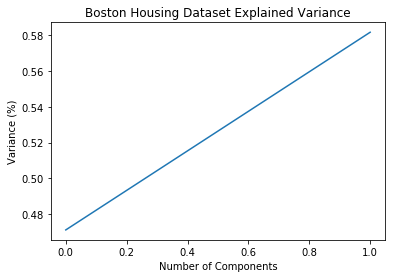

In [121]:
plt.figure()
plt.plot(np.cumsum(pca_variables))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Boston Housing Dataset Explained Variance')
plt.show()

#### PCA Test Train Spilit 
Priciple component 1 and 2 will be used to train the model.

In [122]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#from sklearn.decomposition import PCA

#pca = PCA()
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

#explained_variance = pca.explained_variance_ratio_

### Using Keras to Predict House Prices

The Keras package was used to create neural networks inorder to predict the median house prices. The data and required pakages were imported.

All of the thirteen variables within the dataset were used to conduct the first prediction.

The data was split between between test and training data 20% and 80% respectively. 

#### Import parkages to create neural network

In [123]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as preprocessing

# For splitting into training and test datasets.
import sklearn.model_selection as mod

### Inputs for neural network

In [124]:
#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [125]:
#This contains all columns excluding the median house prices (MEDV)
inputs = df.drop(columns =['MEDV'])
#This only includes the column median house prices (MEDV)
outputs = df[['MEDV']]
inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


### Split dataset into test & train data

In [126]:
#Scale input data to zero mean and unit variance
scaler = preprocessing.StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
print(scaled_inputs)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [127]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(scaled_inputs, outputs, test_size=0.2)

## Build Model 
A sequential model was chosen in order to create several layers 

The neural network was created with three layers. 
* The first layer was the input layer and this contained 13 neurons and the input shape was 13, as there was 13 input variables. The activation function used was relu.The relu activation function works by returning the input value unless the value is zero or less than zero. In neural nets relu act like a linear activation function. 

* The second layer contains six neurons and the relu activation function. 
* The thrid layer is the output unit which represents the predicted median house prices. 




In [128]:
def model():
    model =  kr.models.Sequential()
    model.add(kr.layers.Dense(units=13,kernel_initializer='normal', activation='relu', input_dim=13))
    model.add(kr.layers.Dense(units=6,kernel_initializer='normal', activation='relu'))
    model.add(kr.layers.Dense(units=1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [129]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=model, verbose=0)
batch_size = [5,10,20,40,60,80,100]
epochs = [5,10,20,40,60,80,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
np.random.seed(42) 
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3,scoring='neg_mean_squared_error')
grid_result = grid.fit(inputs_train, outputs_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(grid_result.param_grid)

Best: -369.756411 using {'batch_size': 5, 'epochs': 5}
{'batch_size': [5, 10, 20, 40, 60, 80, 100], 'epochs': [5, 10, 20, 40, 60, 80, 100]}


In [130]:
print('batch_size')

batch_size


In [131]:
np.random.seed(42) 
estimator.fit(inputs_train,outputs_train,epochs=10, batch_size=10)
estimator.model.summary()

Model: "sequential_577"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1729 (Dense)           (None, 13)                182       
_________________________________________________________________
dense_1730 (Dense)           (None, 6)                 84        
_________________________________________________________________
dense_1731 (Dense)           (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Have the network predict the classes of the test inputs.
predictions = estimator.model.predict(inputs_test)
print(predictions)

[[37.83413 ]
 [48.306133]
 [27.042336]
 [24.316057]
 [40.479492]
 [37.810116]
 [33.609173]
 [44.46138 ]
 [37.128067]
 [30.006746]
 [39.646824]
 [25.31838 ]
 [35.05158 ]
 [39.35322 ]
 [22.077066]
 [32.540253]
 [38.31756 ]
 [36.008408]
 [57.48043 ]
 [72.42576 ]
 [28.409779]
 [22.442614]
 [35.64634 ]
 [35.49513 ]
 [41.42048 ]
 [55.498543]
 [26.157495]
 [32.888165]
 [31.004618]
 [47.13187 ]
 [18.70035 ]
 [29.321875]
 [37.923557]
 [57.403343]
 [21.087557]
 [29.6164  ]
 [23.10642 ]
 [41.653057]
 [46.632965]
 [29.83603 ]
 [49.53916 ]
 [40.873413]
 [38.249092]
 [40.020306]
 [48.844784]
 [14.959195]
 [32.913723]
 [34.100876]
 [39.705746]
 [34.380642]
 [30.349808]
 [54.21429 ]
 [40.10372 ]
 [34.975803]
 [24.270308]
 [33.12156 ]
 [39.388077]
 [21.58016 ]
 [35.731827]
 [34.728054]
 [35.42718 ]
 [22.463167]
 [49.480743]
 [31.079195]
 [33.88008 ]
 [37.41083 ]
 [27.175852]
 [55.345345]
 [58.208725]
 [58.62947 ]
 [34.11447 ]
 [36.186523]
 [39.337666]
 [53.5357  ]
 [40.365345]
 [34.26203 ]
 [48.201153]

In [133]:
from sklearn.metrics import mean_squared_error
mean_squared_error(outputs_test,predictions) 

370.0824947996602

### Calculate error in model (Using mean absolute error)

In [134]:
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

np.mean(abs(predictions - outputs_test))

MEDV    16.581118
dtype: float64

##### References 

[2] Data Cleaning with Python and Pandas: Detecting Missing Values https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b (Accessed 21.11.19)

[3]Dimension Reduction Techniques with Python https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c (Accessed 21.11.19)

[4]SciKit Learn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA (Accessed 21.11.19)

[5] A complete guide to scatterplots https://chartio.com/learn/charts/what-is-a-scatter-plot/ (Accessed 24.11.19)

[6] Linear Regression on Boston Housing Dataset https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 (Accessed 03.12.19)

[7] Example of Multiple Linear Regression in Python https://datatofish.com/multiple-linear-regression-python/ (Accessed 04.12.19)

[8] Implementing PCA in Python with Scikit-Learn https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/ (Accessed 4.12.19)

[9] Building our first neural network in keras https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5 Accessed (06.12.19)

[10] Multicollinearity https://en.wikipedia.org/wiki/Multicollinearity (Accessed 06.12.19)

[11] GeekForGeeks Python | Mean Squared Error https://www.geeksforgeeks.org/python-mean-squared-error/

[12] A Gentle Introduction to the Rectified Linear Unit (ReLU) https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ (Accessed 12.12.19) 

[13]How to Use the Keras Functional API for Deep Learning https://machinelearningmastery.com/keras-functional-api-deep-learning/ (Accessed 12.12.19)